##Including Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score as cvscore
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cc_data=pd.read_csv('/content/drive/MyDrive/ml_lab_data/creditcard.csv')
data = pd.read_csv('/content/drive/MyDrive/ml_lab_data/creditcard.csv')
df = pd.DataFrame(data)
display(df)
cc_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The given data is having 31 columns out of which 30 are features and 1 is labels or targets

##Data Visualization

Not Fraud Values are:- 284315
Fraud Values are:- 492


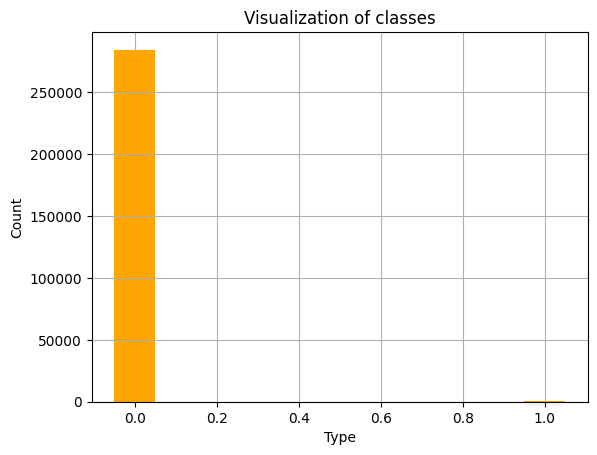

In [ ]:
cc_data['Class'].unique()
unique_count=[0,0]
for i in range(len(cc_data['Class'])):
  unique_count[cc_data['Class'][i]]+=1
print('Not Fraud Values are:-',unique_count[0])
print('Fraud Values are:-',unique_count[1])

plt.bar([0,1],unique_count,width=0.1,color='orange')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Visualization of classes')
plt.grid()
plt.show()

### We can see that the data is totally biased most of the data is of non fraud values and having very less fraud values. We can deduce following points from it-->


*   The accuracy alone is not a good measure to check model so we will have to look for more measures.


*   Normal sampling technique will not work, either we will have to repeat data is this or have to use new sampling techniques








In [ ]:
h = np.arange(0,len(cc_data['V1']))

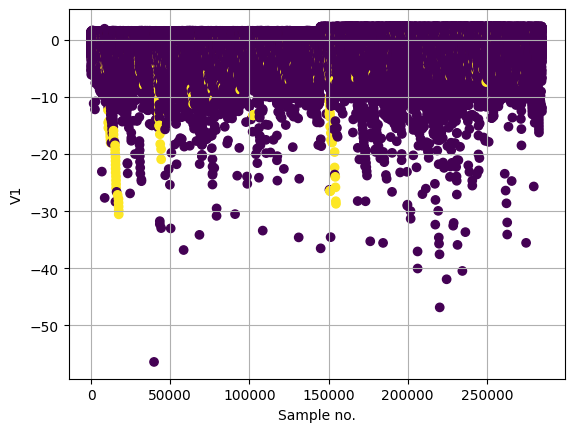

In [ ]:
plt.scatter(h,cc_data['V1'],c=cc_data['Class'])
plt.grid()
plt.xlabel('Sample no.')
plt.ylabel('V1')
plt.show()

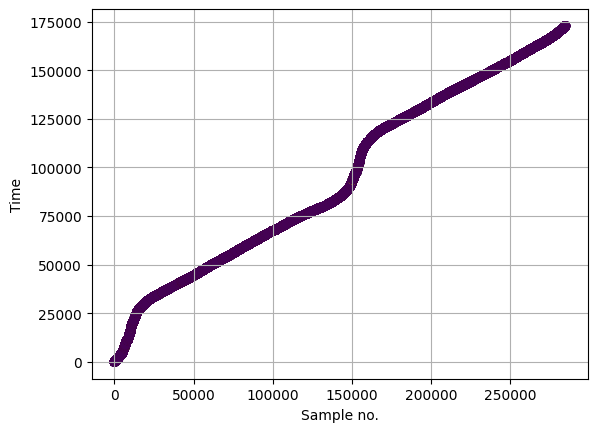

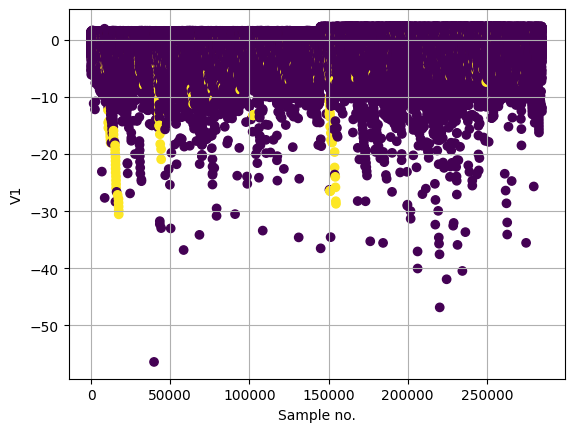

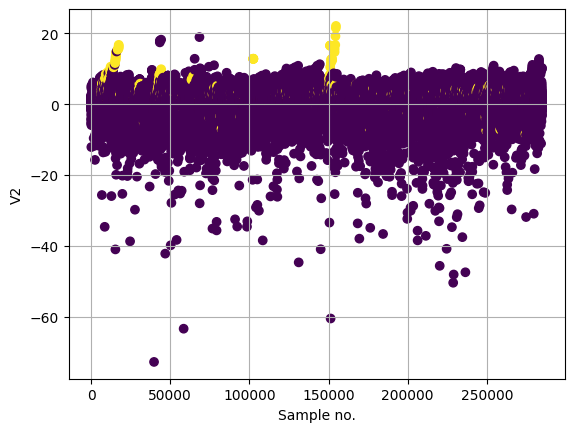

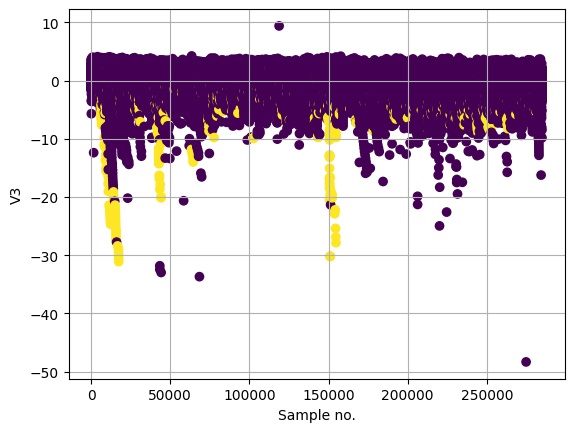

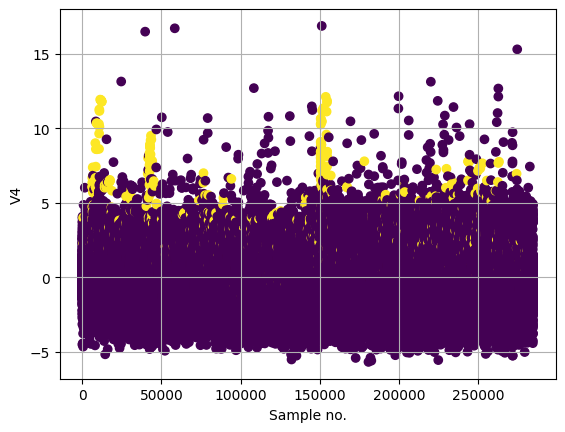

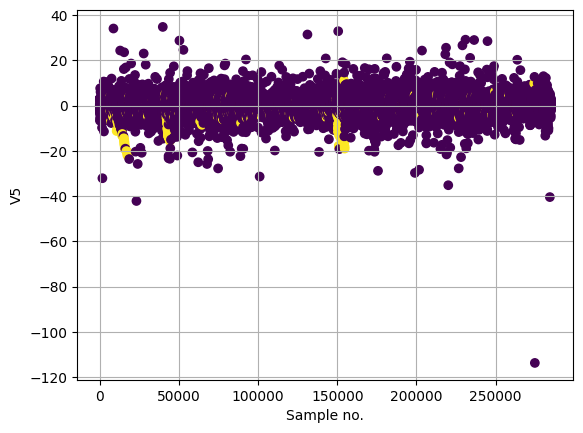

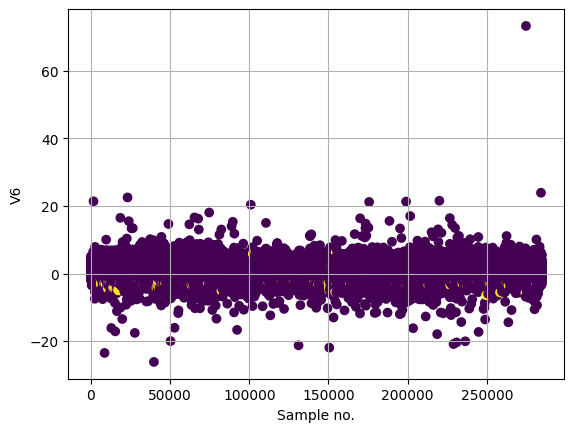

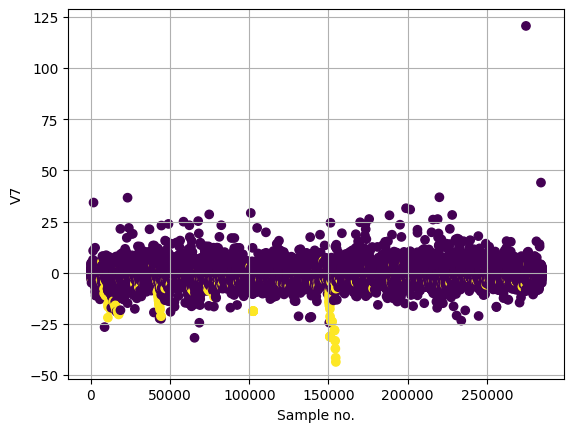

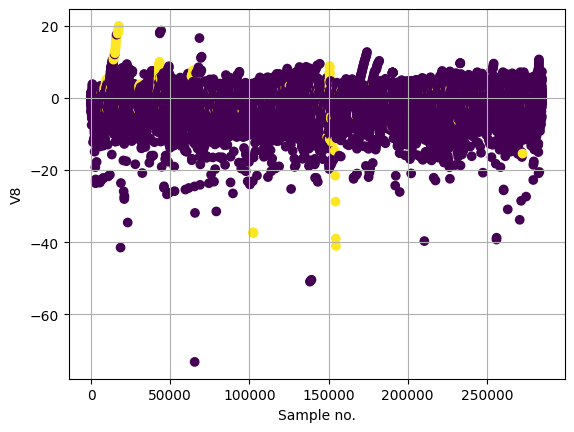

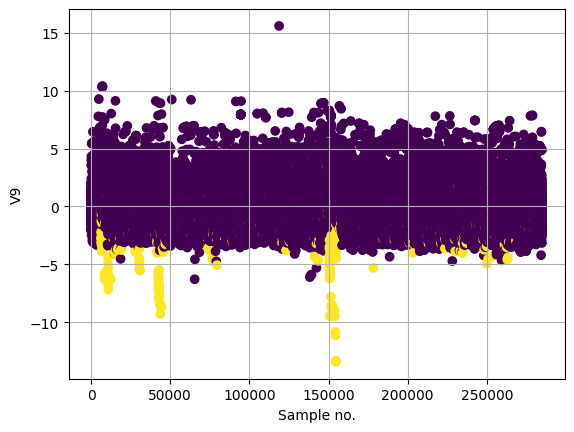

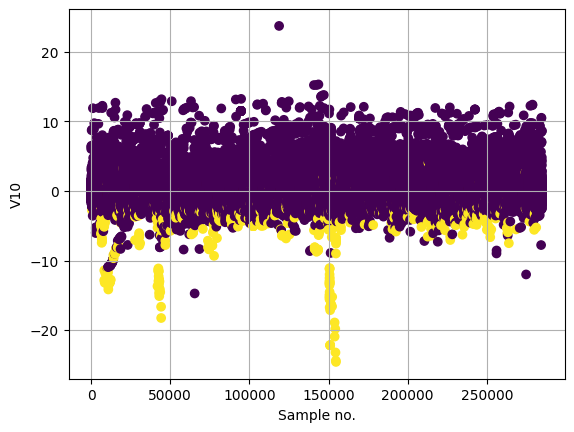

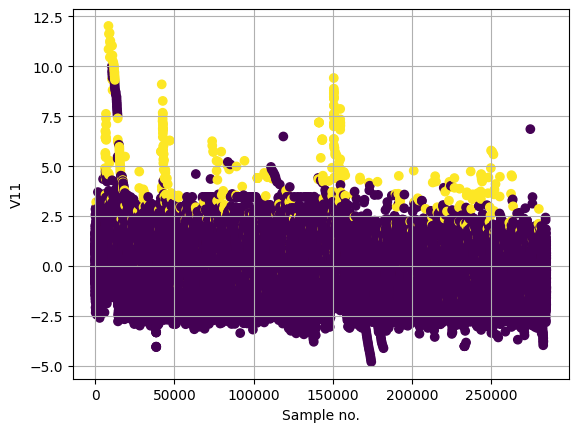

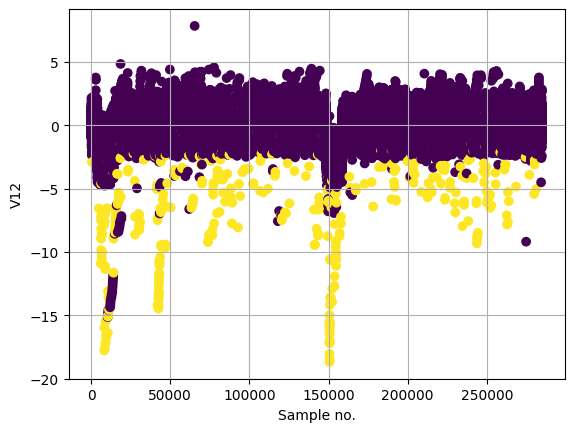

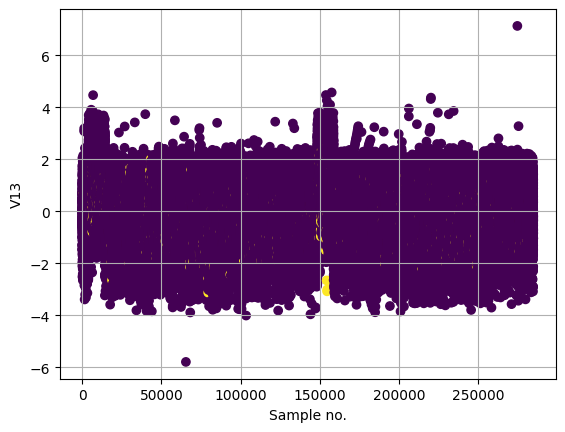

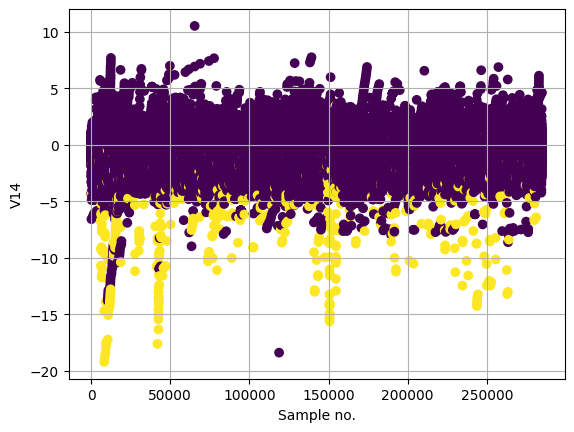

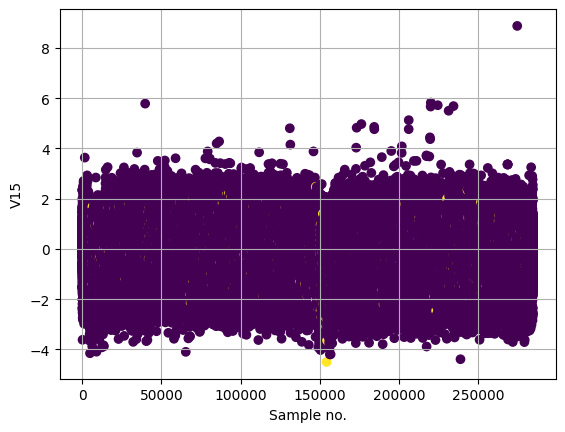

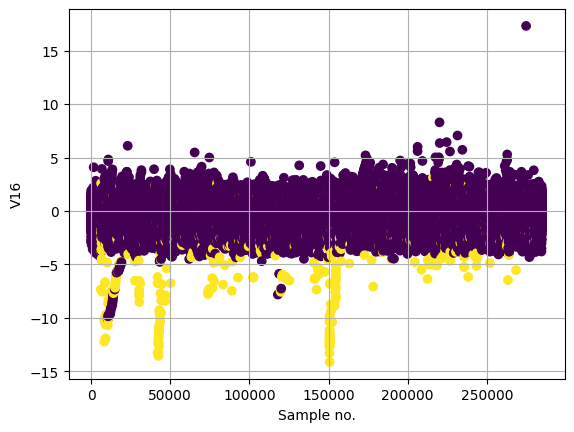

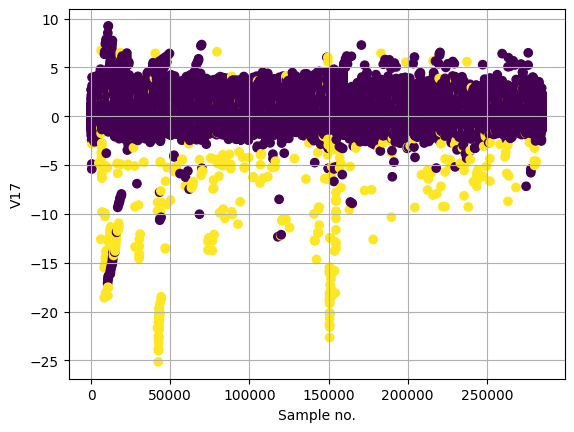

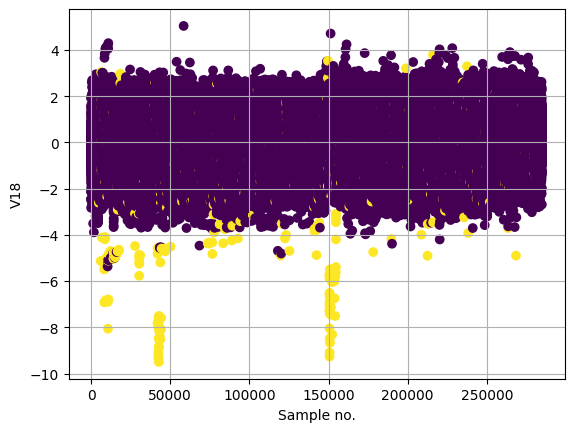

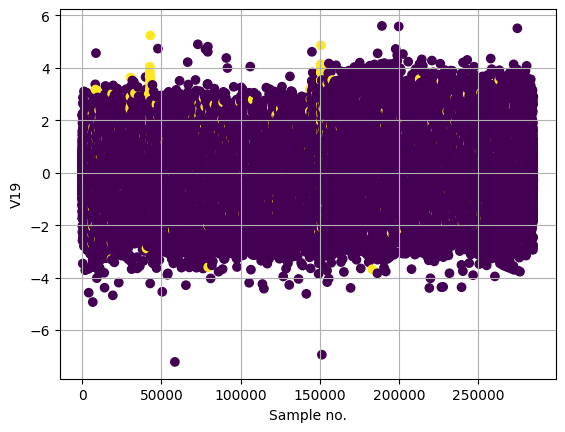

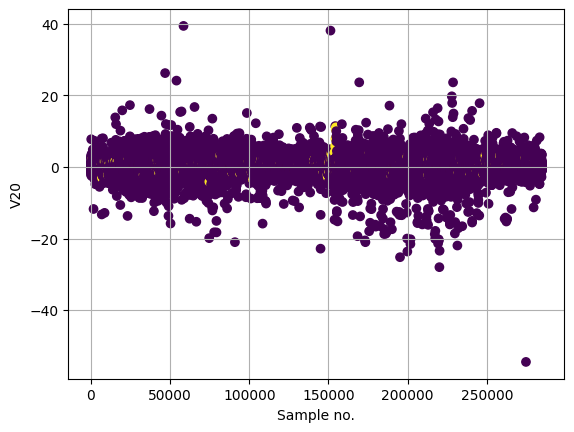

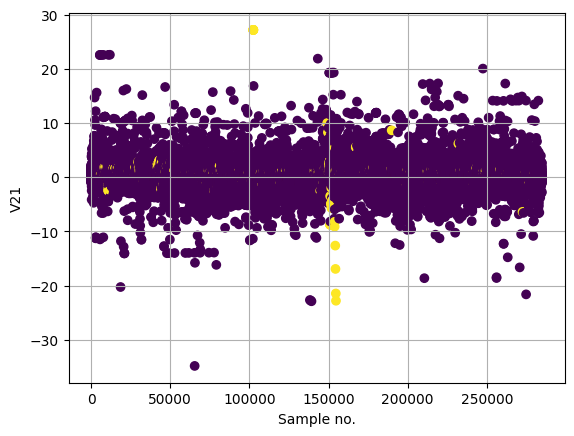

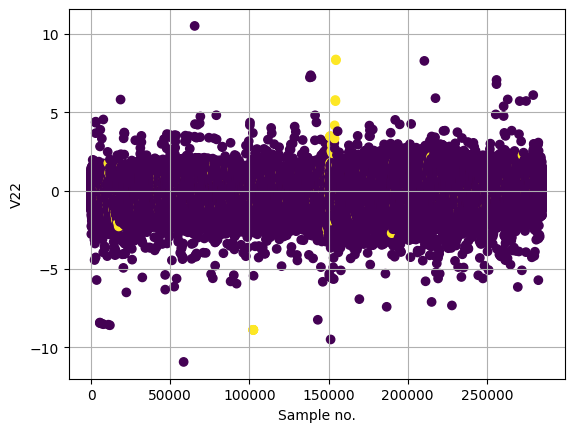

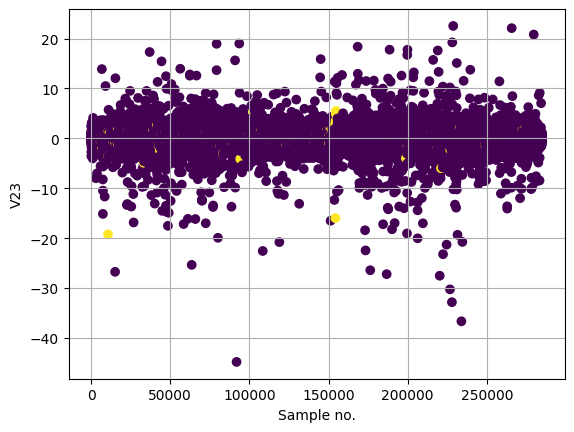

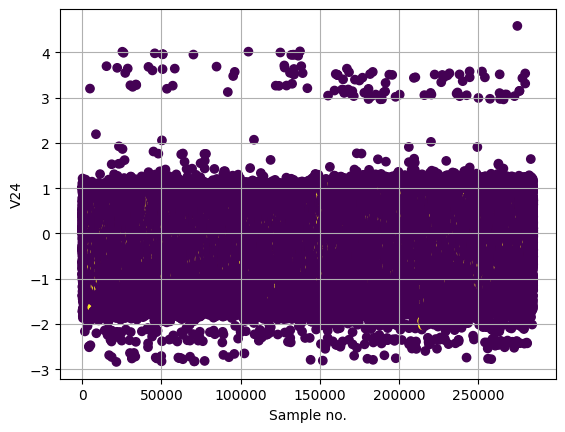

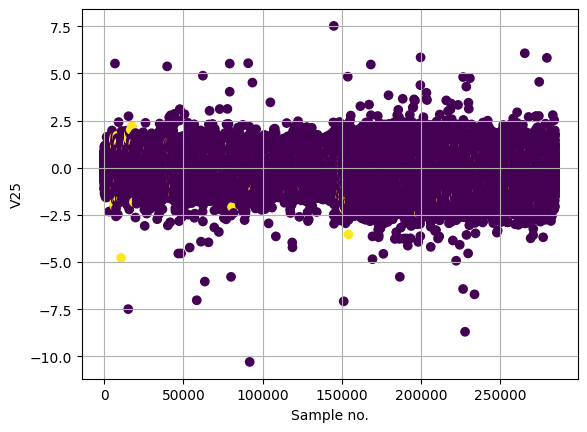

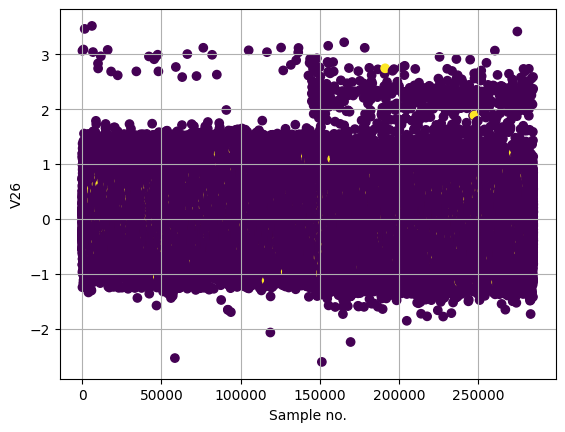

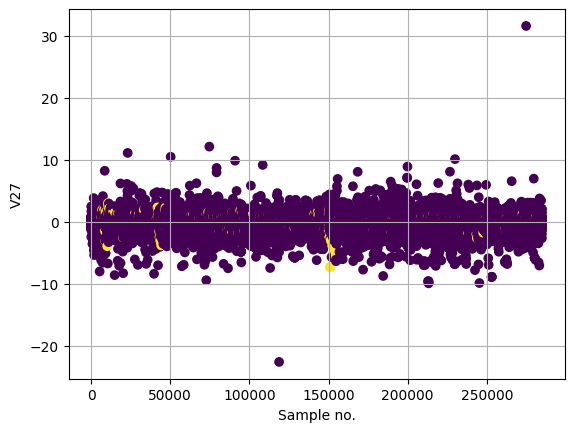

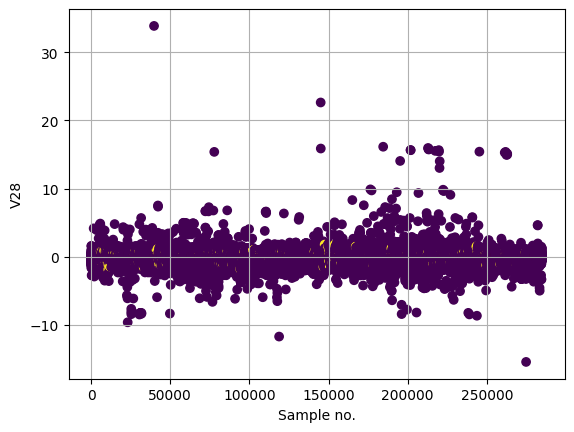

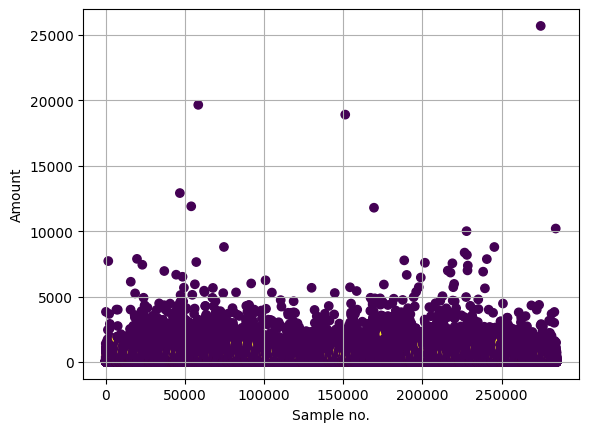

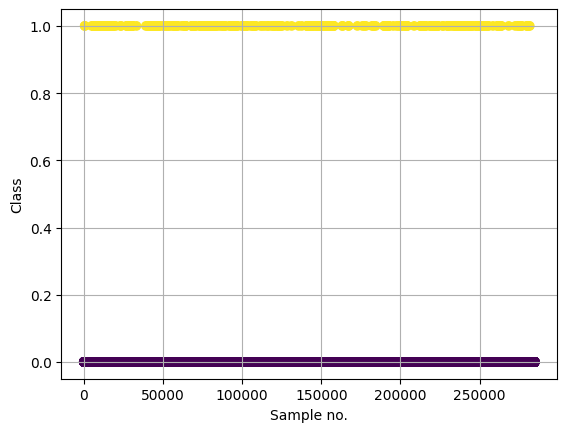

In [ ]:
for columns in cc_data:
  plt.scatter(h,cc_data[columns],c=cc_data['Class'])
  plt.grid()
  plt.xlabel('Sample no.')
  plt.ylabel(columns)
  plt.show()

### we can see the data is well distributed and continous

In [ ]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Data* is already normalized so no preprocessing is required

Function for visualization

In [ ]:
def visualize(model_name,ytrue,ypred):
  metrix=[0,0,0,0]
  for i in range(len(ypred)):
    if(ytrue[i]==0 and ypred[i]==0):
      metrix[0]+=1#true negative
    elif(ytrue[i]==0 and ypred[i]==1):
      metrix[1]+=1#false positive
    elif(ytrue[i]==1 and ypred[i]==0):
      metrix[2]+=1#false negative
    elif(ytrue[i]==1 and ypred[i]==1):
      metrix[3]+=1#true positive
  # Precision
  if metrix[3]+metrix[1]==0:
    precision=None
  else:
    precision=metrix[3]/(metrix[3]+metrix[1])
  # Recall
  if metrix[3]+metrix[2]==0:
    recall=None
  else:
    recall=metrix[3]/(metrix[3]+metrix[2])
  # Sensitivity
  sensitivity=recall
  # Specificity
  if metrix[0]+metrix[1]==0:
    specificity=None
  else:
    specificity=metrix[0]/(metrix[0]+metrix[1])
  # Accuracy Score
  accuracy=(metrix[3]+metrix[0])/len(ypred)
  # F1 Score
  if (precision==None or recall==None):
    f1score=None
  else:
    #print(precision)
    #print(recall)
    f1score=f1_score(ytrue, ypred, zero_division=1,average='weighted')
  # ROC AUC Score
  ROCAUC = roc_auc_score(ytrue,ypred)
  #plotting
  data = {'Negpred': [metrix[0], metrix[2]],
        'Pospred': [metrix[1],metrix[3]]}
  data=pd.DataFrame(data)
  data1={'Metric Type':['Precision','Recall','Sensitivity','Specificity','Accuracy','F1 Score','AUC ROC Score'],'Metric Value':[precision,recall,sensitivity,specificity,accuracy,f1score,ROCAUC]}
  data1=pd.DataFrame(data1)

  print("This is for model",model_name)
  print()
  print('Confusion matrix for ',model_name)
  print('')
  print(data1)
  print()


  Cm = cm(ytrue, ypred, labels=[0,1])
  disp = cmd(confusion_matrix=Cm,display_labels=[0,1])
  disp.plot()
  plt.show()
  print("")
  print("")
  print("")
  print("")
  print("")
  return



This is for model Decision Tree

Confusion matrix for  Decision Tree

     Metric Type  Metric Value
0      Precision      0.798077
1         Recall      0.821782
2    Sensitivity      0.821782
3    Specificity      0.999631
4       Accuracy      0.999315
5       F1 Score      0.999320
6  AUC ROC Score      0.910706



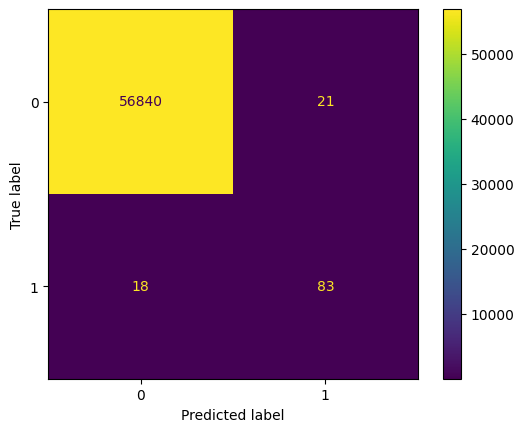






This is for model AdaBoost

Confusion matrix for  AdaBoost

     Metric Type  Metric Value
0      Precision      0.824176
1         Recall      0.742574
2    Sensitivity      0.742574
3    Specificity      0.999719
4       Accuracy      0.999263
5       F1 Score      0.999243
6  AUC ROC Score      0.871146



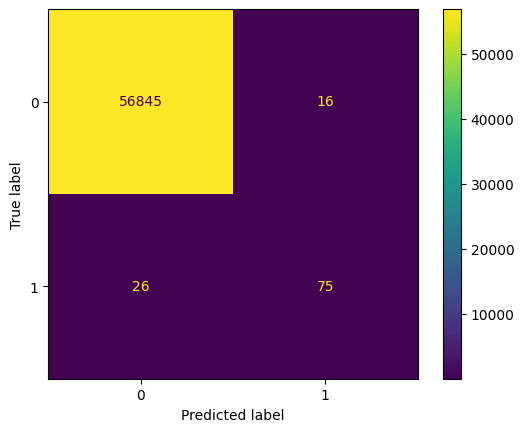






This is for model XGBoost

Confusion matrix for  XGBoost

     Metric Type  Metric Value
0      Precision      0.943820
1         Recall      0.831683
2    Sensitivity      0.831683
3    Specificity      0.999912
4       Accuracy      0.999614
5       F1 Score      0.999602
6  AUC ROC Score      0.915798



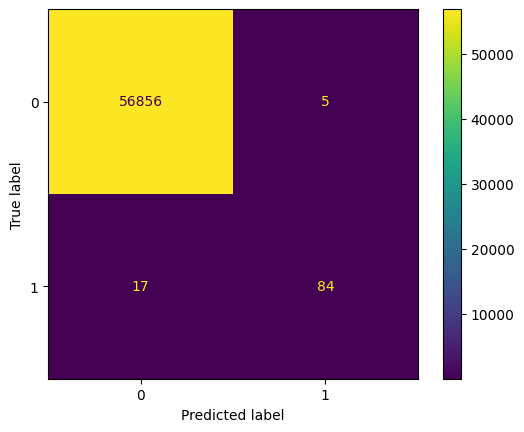






This is for model K Nearest Neighbours

Confusion matrix for  K Nearest Neighbours

     Metric Type  Metric Value
0      Precision      1.000000
1         Recall      0.049505
2    Sensitivity      0.049505
3    Specificity      1.000000
4       Accuracy      0.998315
5       F1 Score      0.997552
6  AUC ROC Score      0.524752



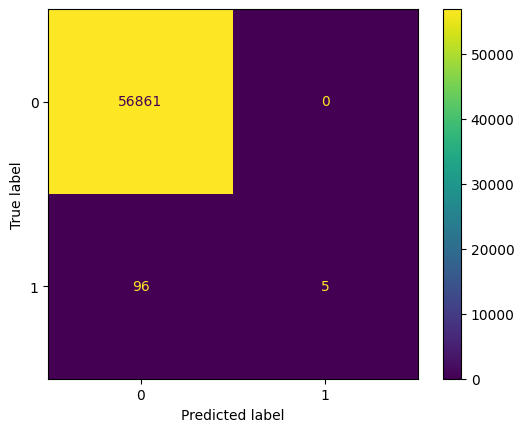






This is for model Support Vector Machine

Confusion matrix for  Support Vector Machine

     Metric Type  Metric Value
0      Precision           NaN
1         Recall      0.000000
2    Sensitivity      0.000000
3    Specificity      1.000000
4       Accuracy      0.998227
5       F1 Score           NaN
6  AUC ROC Score      0.500000



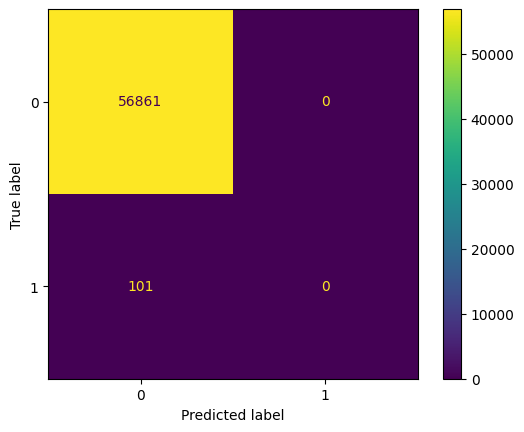






This is for model LDA Classifier

Confusion matrix for  LDA Classifier

     Metric Type  Metric Value
0      Precision      0.875000
1         Recall      0.762376
2    Sensitivity      0.762376
3    Specificity      0.999807
4       Accuracy      0.999386
5       F1 Score      0.999364
6  AUC ROC Score      0.881091



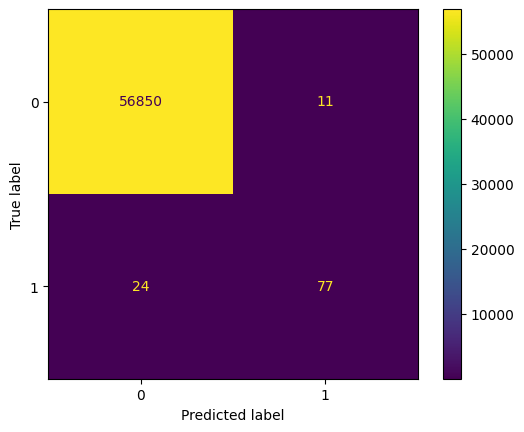

In [ ]:
# Seperating dependent and independent columns
X=cc_data.drop(['Class'],axis=1).values
Y=cc_data['Class'].values
X_train, X_test, Y_train, Y_test = train_test_split(
X,Y , random_state=0,test_size=0.2, shuffle=True)

# Training and visualizing accuracy metrics
def ModelScore(X,Y,X_train,Y_train,X_test,Y_test,model,model_name):
  a = model.fit(X_train,Y_train)
  predicted = a.predict(X_test)
  visualize(model_name,Y_test,predicted)


dtc=tree.DecisionTreeClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,dtc,'Decision Tree')

adbc=AdaBoostClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,adbc,'AdaBoost')

xgbc=XGBClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,xgbc,'XGBoost')

knnc=KNeighborsClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,knnc,'K Nearest Neighbours')

svmc=SVC()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,svmc,'Support Vector Machine')

ldac=LinearDiscriminantAnalysis()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,ldac,'LDA Classifier')

This is for model Multilayered perceptron neural network

Confusion matrix for  Multilayered perceptron neural network

     Metric Type  Metric Value
0      Precision      0.580645
1         Recall      0.712871
2    Sensitivity      0.712871
3    Specificity      0.999085
4       Accuracy      0.998578
5       F1 Score      0.998651
6  AUC ROC Score      0.855978



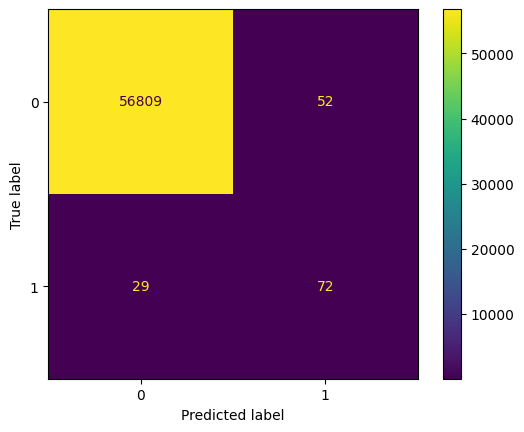

In [ ]:
mlpc = MLPClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,mlpc,'Multilayered perceptron neural network')

##Sampling1

In [ ]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
sample_normal = normal.sample(frac = 0.1, random_state = 42)
sample_fraud = fraud.sample(frac = 0.1, random_state = 42)
sample_data = pd.concat([sample_normal, sample_fraud])                          # Keeping the proportion of positive and negative class same as original dataset
np.shape(sample_data)

(28481, 31)

This is for model Decision Tree

Confusion matrix for  Decision Tree

     Metric Type  Metric Value
0      Precision      0.727273
1         Recall      0.571429
2    Sensitivity      0.571429
3    Specificity      0.999472
4       Accuracy      0.998420
5       F1 Score      0.998326
6  AUC ROC Score      0.785450



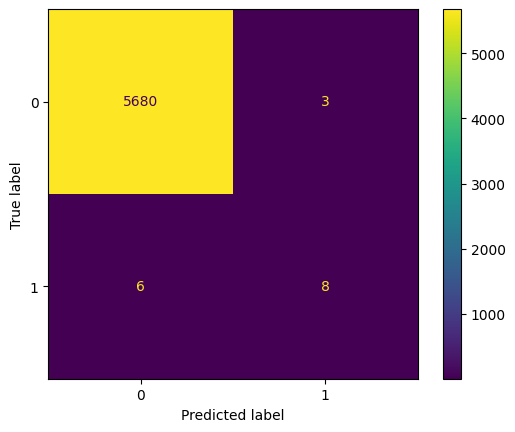






This is for model AdaBoost

Confusion matrix for  AdaBoost

     Metric Type  Metric Value
0      Precision      0.909091
1         Recall      0.714286
2    Sensitivity      0.714286
3    Specificity      0.999824
4       Accuracy      0.999122
5       F1 Score      0.999070
6  AUC ROC Score      0.857055



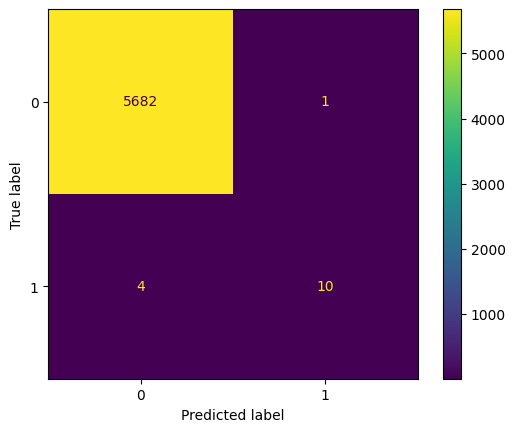






This is for model XGBoost

Confusion matrix for  XGBoost

     Metric Type  Metric Value
0      Precision      0.916667
1         Recall      0.785714
2    Sensitivity      0.785714
3    Specificity      0.999824
4       Accuracy      0.999298
5       F1 Score      0.999271
6  AUC ROC Score      0.892769



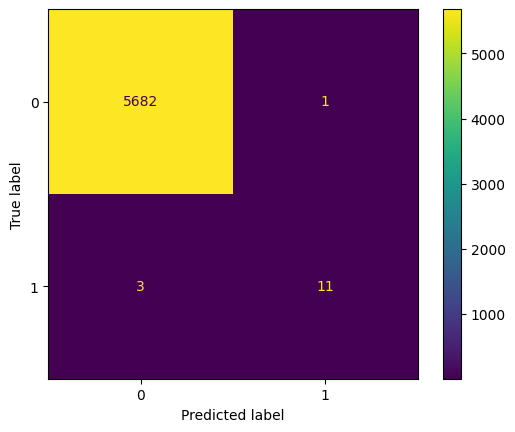






This is for model K Nearest Neighbours

Confusion matrix for  K Nearest Neighbours

     Metric Type  Metric Value
0      Precision      0.000000
1         Recall      0.000000
2    Sensitivity      0.000000
3    Specificity      0.999824
4       Accuracy      0.997367
5       F1 Score      0.996228
6  AUC ROC Score      0.499912



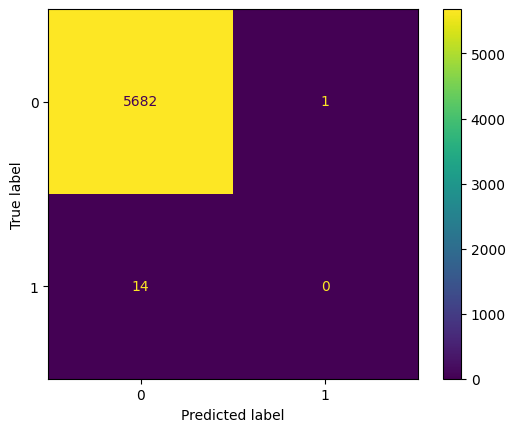






This is for model Support Vector Machine

Confusion matrix for  Support Vector Machine

     Metric Type  Metric Value
0      Precision           NaN
1         Recall      0.000000
2    Sensitivity      0.000000
3    Specificity      1.000000
4       Accuracy      0.997543
5       F1 Score           NaN
6  AUC ROC Score      0.500000



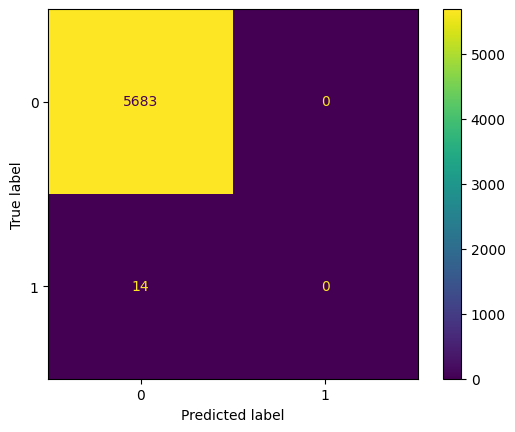






This is for model LDA Classifier

Confusion matrix for  LDA Classifier

     Metric Type  Metric Value
0      Precision      1.000000
1         Recall      0.785714
2    Sensitivity      0.785714
3    Specificity      1.000000
4       Accuracy      0.999473
5       F1 Score      0.999442
6  AUC ROC Score      0.892857



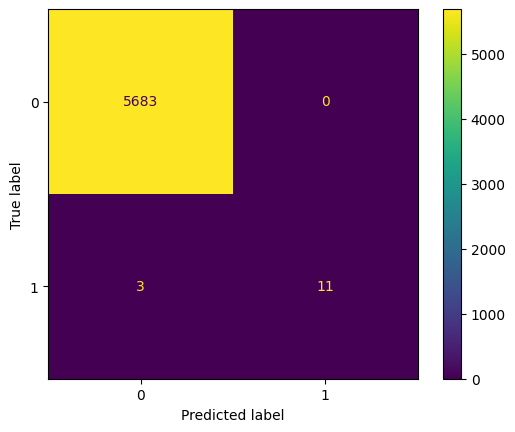

In [ ]:
# Seperating dependent and independent columns
X=sample_data.drop(['Class'],axis=1).values
Y=sample_data['Class'].values
X_train, X_test, Y_train, Y_test = train_test_split(
X,Y , random_state=0,test_size=0.2, shuffle=True)

# Training and visualizing accuracy metrics
def ModelScore(X,Y,X_train,Y_train,X_test,Y_test,model,model_name):
  model = model.fit(X_train,Y_train)
  predicted = model.predict(X_test)
  visualize(model_name,Y_test,predicted)

dtc=tree.DecisionTreeClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,dtc,'Decision Tree')

adbc=AdaBoostClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,adbc,'AdaBoost')

xgbc=XGBClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,xgbc,'XGBoost')

knnc=KNeighborsClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,knnc,'K Nearest Neighbours')
svmc=SVC()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,svmc,'Support Vector Machine')


ldac=LinearDiscriminantAnalysis()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,ldac,'LDA Classifier')

This is for model Multilayered perceptron neural network

Confusion matrix for  Multilayered perceptron neural network

     Metric Type  Metric Value
0      Precision      0.000000
1         Recall      0.000000
2    Sensitivity      0.000000
3    Specificity      0.999824
4       Accuracy      0.997367
5       F1 Score      0.996228
6  AUC ROC Score      0.499912



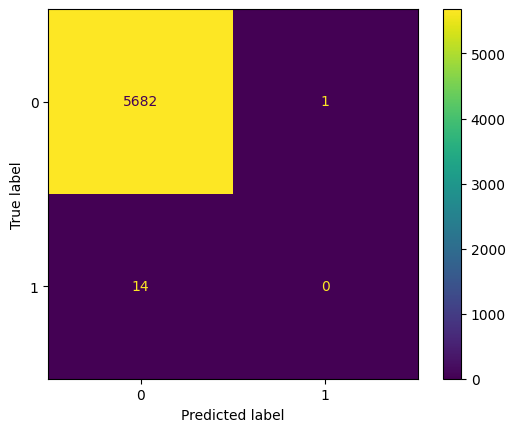

In [ ]:
mlpc = MLPClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,mlpc,'Multilayered perceptron neural network')

##sampling 2

In [ ]:
sample_normal2 = normal.sample(frac = 492/284315, random_state = 42)
sample_data2 = pd.concat([sample_normal2, fraud])                               #Taking equal number of positive and negative classes
np.shape(sample_normal2)

(492, 31)

This is for model Decision Tree

Confusion matrix for  Decision Tree

     Metric Type  Metric Value
0      Precision      0.897196
1         Recall      0.905660
2    Sensitivity      0.905660
3    Specificity      0.879121
4       Accuracy      0.893401
5       F1 Score      0.893357
6  AUC ROC Score      0.892391



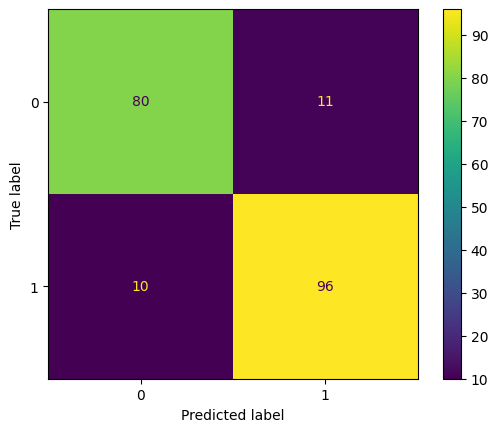






This is for model AdaBoost

Confusion matrix for  AdaBoost

     Metric Type  Metric Value
0      Precision      0.980198
1         Recall      0.933962
2    Sensitivity      0.933962
3    Specificity      0.978022
4       Accuracy      0.954315
5       F1 Score      0.954374
6  AUC ROC Score      0.955992



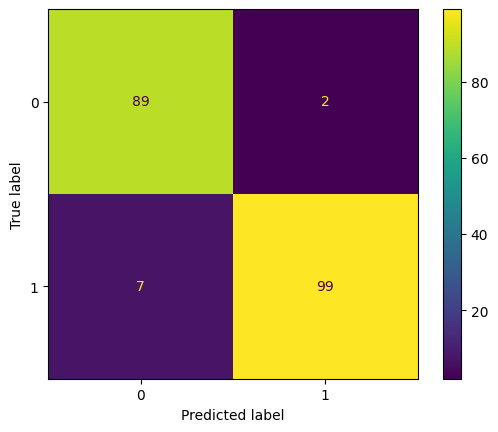






This is for model XGBoost

Confusion matrix for  XGBoost

     Metric Type  Metric Value
0      Precision      0.989691
1         Recall      0.905660
2    Sensitivity      0.905660
3    Specificity      0.989011
4       Accuracy      0.944162
5       F1 Score      0.944240
6  AUC ROC Score      0.947336



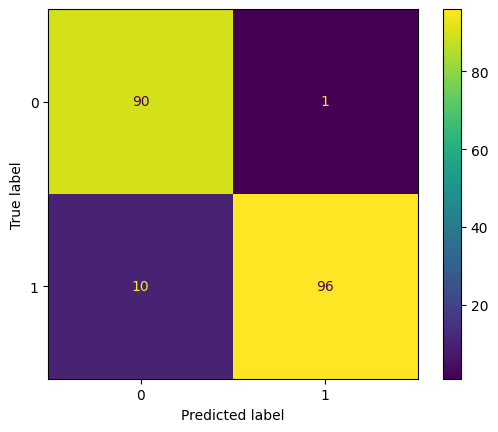






This is for model K Nearest Neighbours

Confusion matrix for  K Nearest Neighbours

     Metric Type  Metric Value
0      Precision      0.670330
1         Recall      0.575472
2    Sensitivity      0.575472
3    Specificity      0.670330
4       Accuracy      0.619289
5       F1 Score      0.619289
6  AUC ROC Score      0.622901



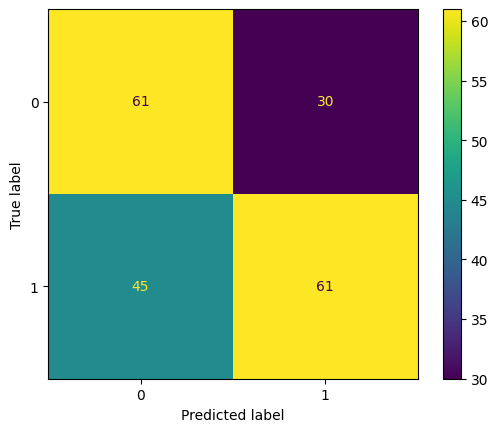






This is for model Support Vector Machine

Confusion matrix for  Support Vector Machine

     Metric Type  Metric Value
0      Precision      0.578512
1         Recall      0.660377
2    Sensitivity      0.660377
3    Specificity      0.439560
4       Accuracy      0.558376
5       F1 Score      0.553133
6  AUC ROC Score      0.549969



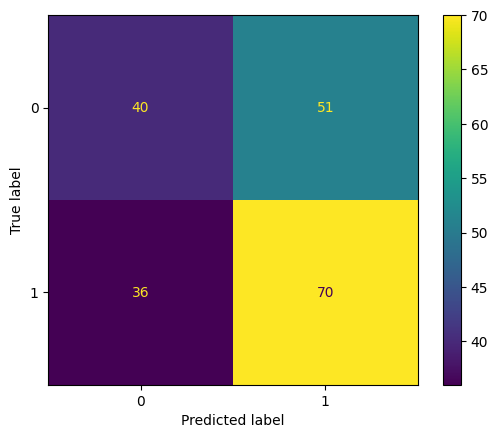






This is for model LDA Classifier

Confusion matrix for  LDA Classifier

     Metric Type  Metric Value
0      Precision      0.988889
1         Recall      0.839623
2    Sensitivity      0.839623
3    Specificity      0.989011
4       Accuracy      0.908629
5       F1 Score      0.908592
6  AUC ROC Score      0.914317



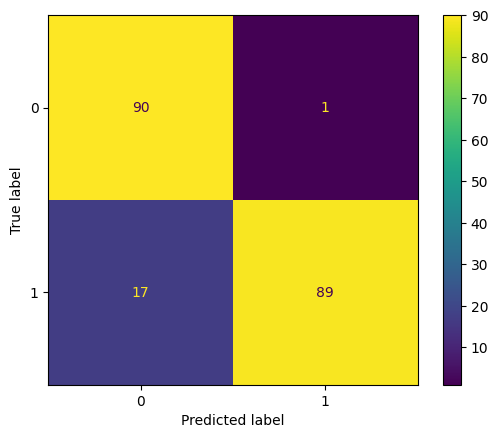

In [ ]:
# Seperating dependent and independent columns
X=sample_data2.drop(['Class'],axis=1).values
Y=sample_data2['Class'].values
X_train, X_test, Y_train, Y_test = train_test_split(
X,Y , random_state=0,test_size=0.2, shuffle=True)

# Training and visualizing accuracy metrics
def ModelScore(X,Y,X_train,Y_train,X_test,Y_test,model,model_name):
  model = model.fit(X_train,Y_train)
  predicted = model.predict(X_test)
  visualize(model_name,Y_test,predicted)

dtc=tree.DecisionTreeClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,dtc,'Decision Tree')

adbc=AdaBoostClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,adbc,'AdaBoost')

xgbc=XGBClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,xgbc,'XGBoost')

knnc=KNeighborsClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,knnc,'K Nearest Neighbours')
svmc=SVC()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,svmc,'Support Vector Machine')


ldac=LinearDiscriminantAnalysis()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,ldac,'LDA Classifier')

mlpc = MLPClassifier()
ModelScore(X_train,Y_train,X_test,Y_test,mlpc,'Multilayered perceptron neural network')

##sampling 3

In [ ]:
normal_under = normal.sample(15000, random_state = 42)
fraud_over = fraud.sample(15000, replace = True)
sample_data3 = pd.concat([normal_under, fraud_over])                               #Taking equal number of positive and negative classes
np.shape(sample_data3)

(30000, 31)

This is for model Decision Tree

Confusion matrix for  Decision Tree

     Metric Type  Metric Value
0      Precision      0.993078
1         Recall      1.000000
2    Sensitivity      1.000000
3    Specificity      0.992970
4       Accuracy      0.996500
5       F1 Score      0.996500
6  AUC ROC Score      0.996485



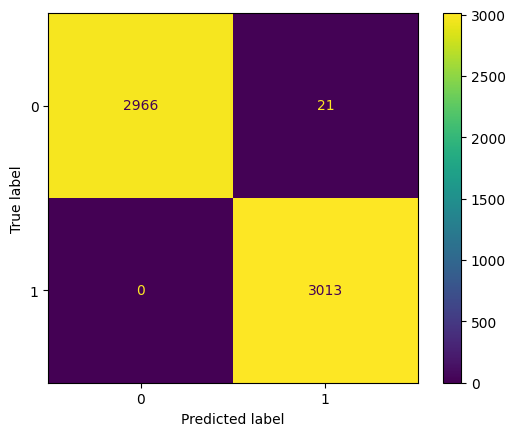






This is for model AdaBoost

Confusion matrix for  AdaBoost

     Metric Type  Metric Value
0      Precision      0.980137
1         Recall      0.949884
2    Sensitivity      0.949884
3    Specificity      0.980583
4       Accuracy      0.965167
5       F1 Score      0.965161
6  AUC ROC Score      0.965233



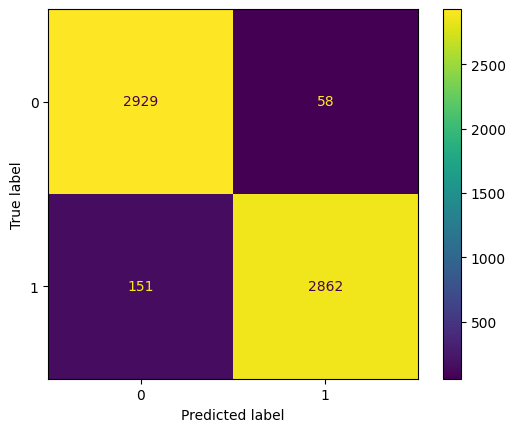






This is for model XGBoost

Confusion matrix for  XGBoost

     Metric Type  Metric Value
0      Precision      0.998013
1         Recall      1.000000
2    Sensitivity      1.000000
3    Specificity      0.997991
4       Accuracy      0.999000
5       F1 Score      0.999000
6  AUC ROC Score      0.998996



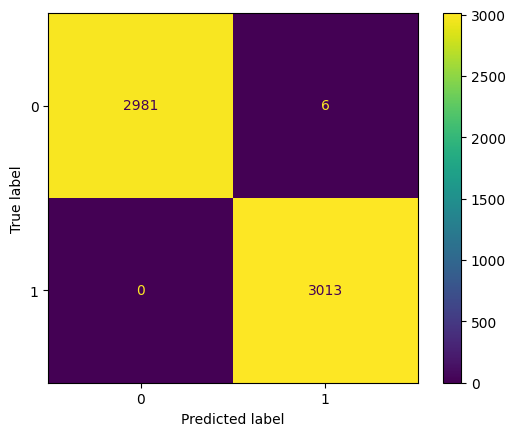






This is for model K Nearest Neighbours

Confusion matrix for  K Nearest Neighbours

     Metric Type  Metric Value
0      Precision      0.931664
1         Recall      1.000000
2    Sensitivity      1.000000
3    Specificity      0.926013
4       Accuracy      0.963167
5       F1 Score      0.963111
6  AUC ROC Score      0.963006



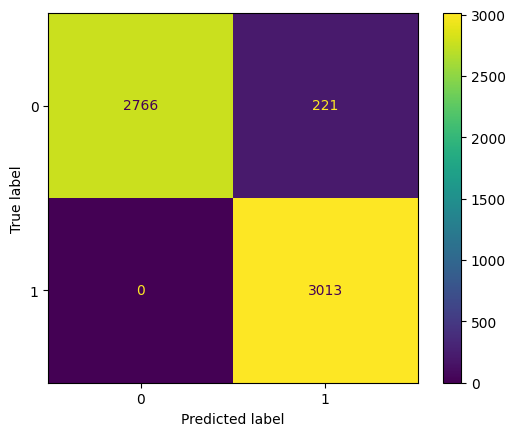






This is for model Support Vector Machine

Confusion matrix for  Support Vector Machine

     Metric Type  Metric Value
0      Precision      0.569426
1         Recall      0.714570
2    Sensitivity      0.714570
3    Specificity      0.454972
4       Accuracy      0.585333
5       F1 Score      0.578184
6  AUC ROC Score      0.584771



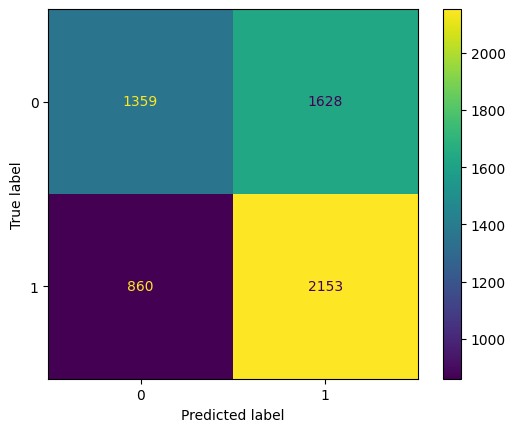






This is for model LDA Classifier

Confusion matrix for  LDA Classifier

     Metric Type  Metric Value
0      Precision      0.981488
1         Recall      0.862264
2    Sensitivity      0.862264
3    Specificity      0.983596
4       Accuracy      0.922667
5       F1 Score      0.922398
6  AUC ROC Score      0.922930



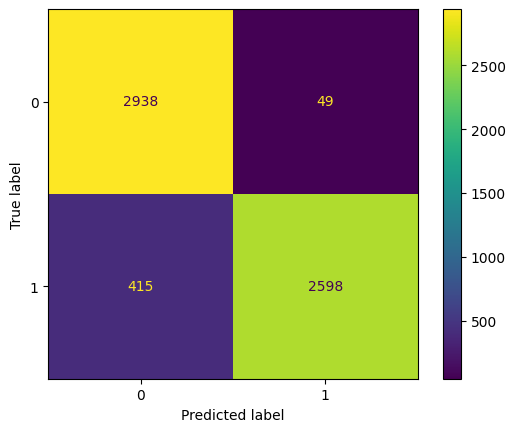

In [ ]:
# Seperating dependent and independent columns
X=sample_data3.drop(['Class'],axis=1).values
Y=sample_data3['Class'].values
X_train, X_test, Y_train, Y_test = train_test_split(
X,Y , random_state=0,test_size=0.2, shuffle=True)

# Training and visualizing accuracy metrics
def ModelScore(X,Y,X_train,Y_train,X_test,Y_test,model,model_name):
  model = model.fit(X_train,Y_train)
  predicted = model.predict(X_test)
  visualize(model_name,Y_test,predicted)

dtc=tree.DecisionTreeClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,dtc,'Decision Tree')

adbc=AdaBoostClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,adbc,'AdaBoost')

xgbc=XGBClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,xgbc,'XGBoost')

knnc=KNeighborsClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,knnc,'K Nearest Neighbours')
svmc=SVC()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,svmc,'Support Vector Machine')


ldac=LinearDiscriminantAnalysis()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,ldac,'LDA Classifier')

This is for model Multilayered perceptron neural network

Confusion matrix for  Multilayered perceptron neural network

     Metric Type  Metric Value
0      Precision      0.981839
1         Recall      0.861268
2    Sensitivity      0.861268
3    Specificity      0.983930
4       Accuracy      0.922333
5       F1 Score      0.922058
6  AUC ROC Score      0.922599



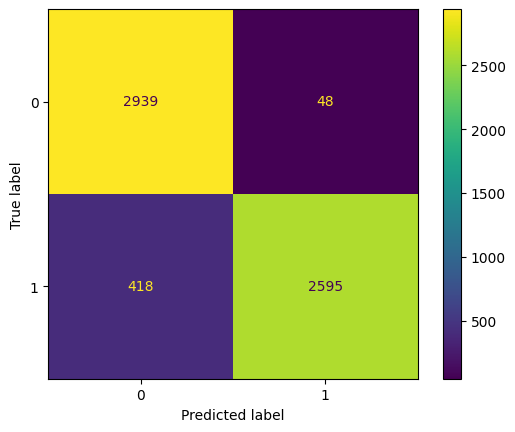

In [ ]:
mlpc = MLPClassifier()
ModelScore(X,Y,X_train,Y_train,X_test,Y_test,mlpc,'Multilayered perceptron neural network')